In [1]:
import numpy as np
import trace_gen as tg

In [3]:
def sim_clock(trace):
    M = len(set(trace))
    K = M // 20
    c = np.arange(1, M, K)
    hr_clock = [tg.sim_clock(int(_c), trace, raw=True) for _c in c]
    return c, hr_clock

def clock_mean_tc(lmb, taus):
    Cs, Ph = [], []
    for tc in taus:
        x    = lmb * tc
        pm_i = 1.0 / (1.0 + x + x*x)
        pm   = np.sum(lmb*pm_i)       
        occ = np.sum(lmb * pm_i * (1.0 + x)) 
        Cs.append(tc * occ)
        Ph.append(1 - pm)
    return np.array(Cs), np.array(Ph)

def clock_fix_tc(lmb, taus): 
    Cs, Ph = [], []
    for tc in taus:
        x    = lmb * tc
        pm_i = 1.0/(1 + x*np.exp(x))
        pm   = np.sum(lmb*pm_i)      
        occ  = np.sum(lmb*pm_i*np.exp(x))    
        Cs.append(tc * occ)
        Ph.append(1 - pm)
    return np.array(Cs), np.array(Ph)

def gen_from_zipf(M, n, a):
    ranks = np.arange(1, M+1)
    p = ranks**(-a)
    p /= p.sum()
    return np.random.choice(M, size=n, p=p)

In [ ]:
# model
M = 100
lmb = np.arange(1, M+1) ** (-1.1)
lmb = lmb / lmb.sum()
taus = 1500 * (np.linspace(0.1, 1, 10) ** 2.0)
# trace for simulation
trc_zipf = gen_from_zipf(100, 10000, 1.1)

In [7]:
C_f_c, Ph_f_c = clock_fix_tc(lmb, taus)
model_cs_c = C_f_c.astype(int)
model_phits_c = Ph_f_c
sim_phits_c = np.array([
    tg.sim_clock(c, trc_zipf, raw=False)
    for c in model_cs_c
])
for c, m, s in zip(model_cs_c, model_phits_c, sim_phits_c):
    print(f"C={c:3d}  model Phit={m:.4f}  sim Phit={s:.4f}")

C= 11  model Phit=0.5155  sim Phit=0.5183
C= 29  model Phit=0.7389  sim Phit=0.7325
C= 48  model Phit=0.8481  sim Phit=0.8420
C= 65  model Phit=0.9115  sim Phit=0.9109
C= 78  model Phit=0.9497  sim Phit=0.9487
C= 87  model Phit=0.9724  sim Phit=0.9693
C= 92  model Phit=0.9854  sim Phit=0.9822
C= 96  model Phit=0.9926  sim Phit=0.9907
C= 98  model Phit=0.9963  sim Phit=0.9952
C= 99  model Phit=0.9982  sim Phit=0.9976


In [8]:
C_m_c, Ph_m_c = clock_mean_tc(lmb, taus)
model_cs_c = C_m_c.astype(int)
model_phits_c = Ph_m_c
sim_phits_c = np.array([
    tg.sim_clock(c, trc_zipf, raw=False)
    for c in model_cs_c
])
for c, m, s in zip(model_cs_c, model_phits_c, sim_phits_c):
    print(f"C={c:3d}  model Phit={m:.4f}  sim Phit={s:.4f}")

C= 10  model Phit=0.4842  sim Phit=0.4939
C= 28  model Phit=0.7103  sim Phit=0.7252
C= 46  model Phit=0.8216  sim Phit=0.8347
C= 61  model Phit=0.8868  sim Phit=0.8948
C= 73  model Phit=0.9271  sim Phit=0.9360
C= 81  model Phit=0.9523  sim Phit=0.9560
C= 87  model Phit=0.9683  sim Phit=0.9693
C= 91  model Phit=0.9785  sim Phit=0.9801
C= 93  model Phit=0.9851  sim Phit=0.9838
C= 95  model Phit=0.9895  sim Phit=0.9887


In [6]:
trace = gen_from_zipf(10000, 1000000, 1.1)
cache = tg.clock(4000)
ref_age, enter_age, _ = cache.run_age(trace)

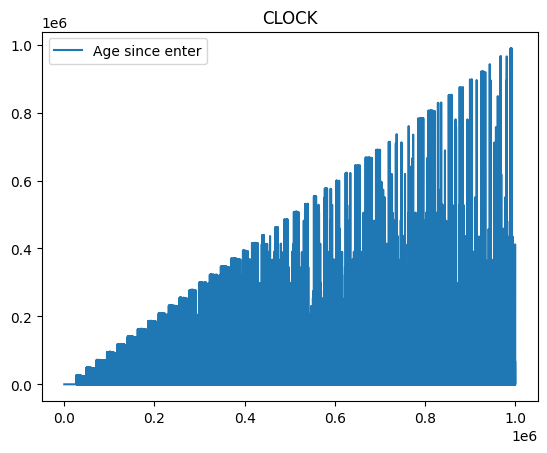

In [7]:
import matplotlib.pyplot as plt
plt.plot(enter_age, label='Age since enter')
plt.legend()
plt.title('CLOCK')
plt.show()

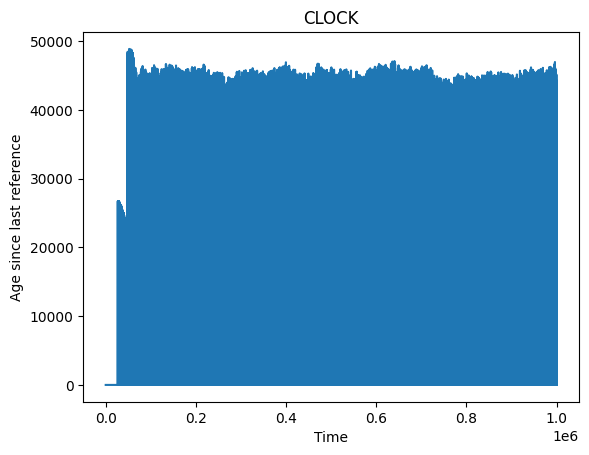

In [13]:
plt.plot(ref_age)
plt.xlabel('Time')
plt.ylabel('Age since last reference')
plt.title('CLOCK')
plt.show()


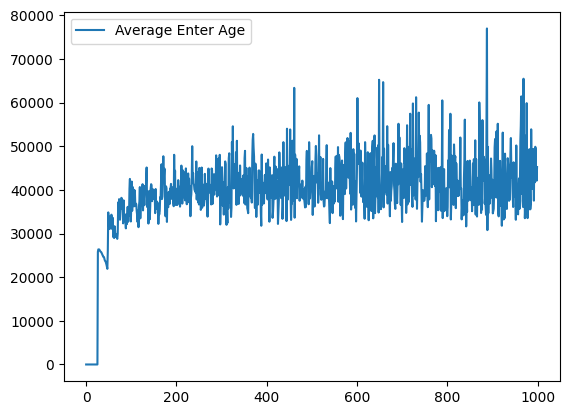

In [ ]:
sum1 = np.zeros(1000)
nl1 = np.zeros(1000)
w = len(trace) // 1000
for i in range(1000):
    sum1[i] = np.sum(enter_age[i*w:(i+1)*w])
    nl1[i] =  np.sum(enter_age[i * w:(i + 1) * w] > 0) + 1
avgs1 = sum1 / nl1
plt.plot(avgs1, label='Average age since enter')
plt.legend()
plt.show()

/tmp/ipykernel_1078401/340048745.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


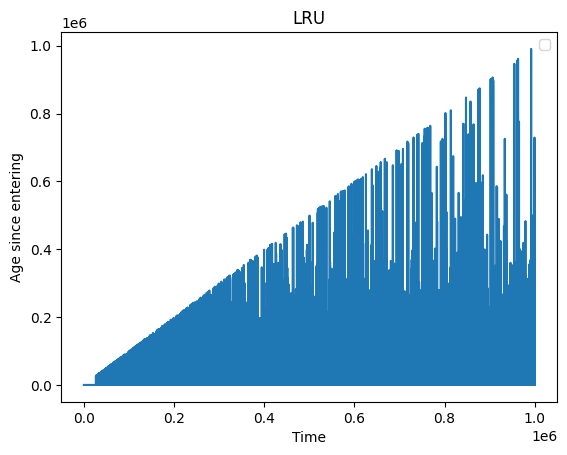

In [8]:
from trace_gen.lru_wrapper import lru as LRU; 
l = LRU(4000)
age1, age2, _= l.run_age(trace)

plt.plot(age2)
plt.xlabel('Time')
plt.ylabel('Age since entering')
plt.title('LRU')
plt.legend()
plt.show()

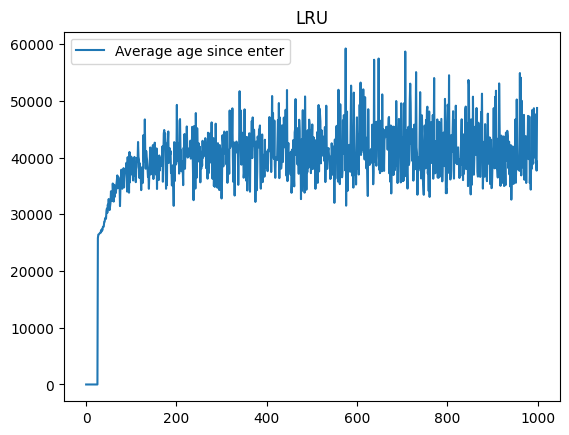

In [10]:
sum2 = np.zeros(1000)
nl2 = np.zeros(1000)
for i in range(1000):
    sum2[i] = np.sum(age2[i*w:(i+1)*w])
    nl2[i] =  np.sum(age2[i * w:(i + 1) * w] > 0) + 1
avgs2 = sum2 / nl2
plt.plot(avgs2)
plt.legend(['Average age since enter'])
plt.title('LRU')
plt.show()

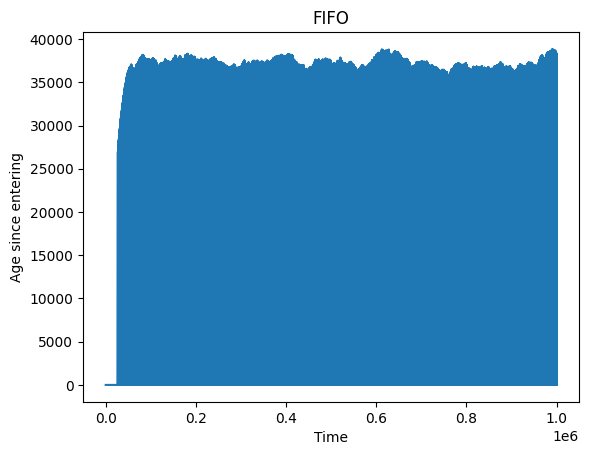

In [11]:
fifo = tg.fifo(4000)
ages, _= fifo.run_age(trace)
plt.plot(ages)
plt.xlabel('Time')
plt.ylabel('Age since entering')
plt.title('FIFO')   
plt.show()

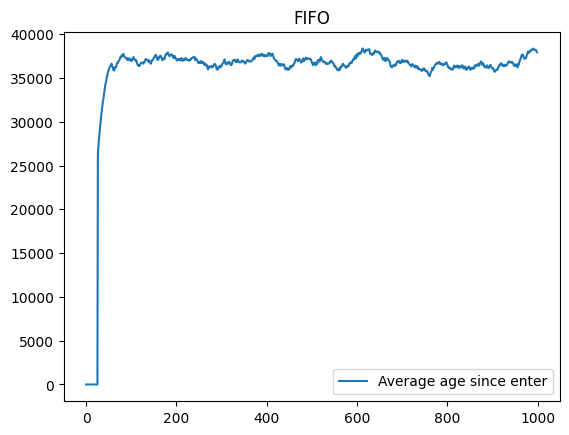

In [12]:
sum3 = np.zeros(1000)
nl3 = np.zeros(1000)
for i in range(1000):
    sum3[i] = np.sum(ages[i*w:(i+1)*w])
    nl3[i] =  np.sum(ages[i * w:(i + 1) * w] > 0) + 1
avgs3 = sum3 / nl3
plt.plot(avgs3)
plt.legend(['Average age since enter'])
plt.title('FIFO')
plt.show()